In [1]:
import os
import sys
import pandas as pd
import numpy as np
sys.path.append(os.path.dirname(os.path.abspath(os.getcwd())) + "/..")
if os.getcwd().endswith("Topic3"):
    os.chdir("..")
    print(f"Changed to {os.getcwd()}")

from codebase import load_demograhics, load_buurt_data, willingness_to_cycle, add_willingness_to_cycle_column, punt_buurt_code_column

Changed to c:\Users\toell\Documents\GitHub\Design-of-AI-driven-business-operation


In [2]:
mode = "fiets"
punt1 = "hbo_wo"
location = "Universities"

df_demographics = load_demograhics()
df_punt = load_buurt_data(punt1, mode=mode)

Loaded file from CSV


In [3]:
df_punt.columns

Index(['hbo_wo_id', 'bu_code', 'reistijd_min', 'reisafstand_m',
       'afstand_hemelsbreed_m', 'omrijdfactor'],
      dtype='object')

Demographics and filtered dataframes do not match in length: 11783 vs 11784, ignoring missing values


<Figure size 1000x1000 with 0 Axes>

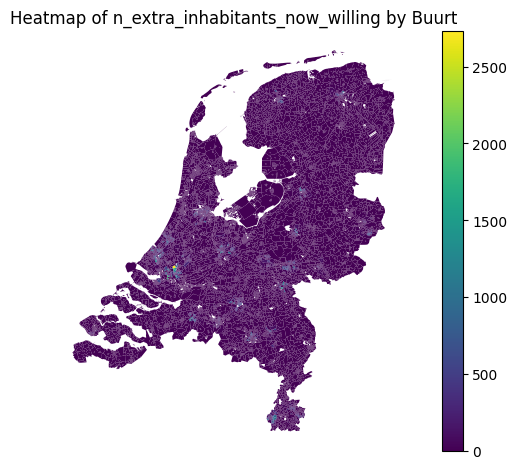

In [4]:
from codebase import calculate_added_willingness, demographics_a_15_24
improvement_column="n_extra_inhabitants_now_willing"
df_with_willingness = calculate_added_willingness(
    df_punt, 
    df_demographics,
    mode=mode,
    location=location,
    detour_max=1.2,
    detour_reduction=0.8,
    improvement_column=improvement_column,
    age_group_column=None,
)

In [5]:
top_n = 10
df_with_willingness.sort_values(by=improvement_column, ascending=False)[["bu_code", improvement_column]][:top_n]

,bu_code,n_extra_inhabitants_now_willing
5810,BU05991463,2730
5818,BU05991574,1963
5821,BU05991577,1814
5809,BU05991449,1711
2291,BU02680616,1546
5808,BU05991448,1443
5812,BU05991467,1427
3212,BU03440831,1381
2278,BU02680320,1363
5804,BU05991290,1329
